In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import decomposition as d
from scikitplot import metrics as mt
from sklearn import metrics as m

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

from sklearn import preprocessing as pp

np.set_printoptions(suppress=True)

2022-12-28 17:13:58.776431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-28 17:13:58.776445: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
path_data = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/data/'
path_model = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/models/'
path_transformation = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/transformation_data/'

In [4]:
data = pd.read_csv(path_data+'ciclo006_feature_selection_dataset.csv')

data.head()

,affiliate_channel,first_affiliate_tracked,age,signup_flow,days_from _first_active_until_account_created,days_from _account_created_until_booking,date_account_created_year,timestamp_first_active_year,date_first_booking_year,date_account_created_month,...,date_first_booking_week_sin,date_first_booking_week_cos,date_account_created_day_sin,date_account_created_day_cos,date_account_created_week_sin,date_account_created_week_cos,timestamp_first_active_week_sin,timestamp_first_active_week_cos,timestamp_first_active_day_sin,timestamp_first_active_day_cos
0,5.268086,5.280842,0.801870,0.0,0.578705,28.468750,0.00,0.600000,1.0,0.454545,...,0.000000,1.000000,-0.571268,0.820763,0.000000,1.000000,0.781831,0.623490,0.571268,0.820763
1,5.131527,5.280842,-0.158925,0.0,0.868441,23.296875,0.25,0.733333,1.0,0.363636,...,0.000000,1.000000,-0.937752,0.347305,0.974928,-0.222521,0.781831,0.623490,0.848644,0.528964
2,5.268086,5.280842,1.413285,3.0,-0.279754,-0.078125,0.00,0.266667,0.0,0.727273,...,0.000000,1.000000,-0.571268,0.820763,0.781831,0.623490,-0.781831,0.623490,0.937752,0.347305
3,5.268086,5.280842,0.190455,0.0,1.567955,4.265625,0.25,1.000000,0.4,1.000000,...,-0.974928,-0.222521,0.848644,0.528964,0.000000,1.000000,0.974928,-0.222521,0.897805,-0.440394
4,5.268086,5.280842,0.103110,0.0,-0.279754,-0.078125,0.00,0.233333,0.0,0.727273,...,0.433884,-0.900969,0.299363,-0.954139,0.781831,0.623490,-0.433884,-0.900969,0.651372,-0.758758


# Machine Learning

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import pickle

In [6]:
X = data.drop('country_destination', axis=1)
Y = data['country_destination'].copy()

# Split Training and Test
x, x_test, y, y_test = train_test_split(X, Y, test_size=0.1, random_state=32)

## Regressão Logistica

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=32)

In [11]:
lr_model = LogisticRegression(solver='newton-cg', n_jobs=-1)

lr_model.fit(x_train, y_train)


/home/wellington/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [13]:
import pickle
#Salvando o treinamento em um arquico compactado
pickle.dump(lr_model, open(path_model+'ciclo010_LogisticRegression.pkl', 'wb'))

In [14]:
#Resultado do Treinamento
lr_train =round(lr_model.score(x_train, y_train) * 100, 2)
print(f'Logistic Regression Model Accuracy: {lr_train}%')

Logistic Regression Model Accuracy: 24.01%


In [20]:
#Validation Prediction
lr_val = lr_model.predict(x_val)

### Metrics

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

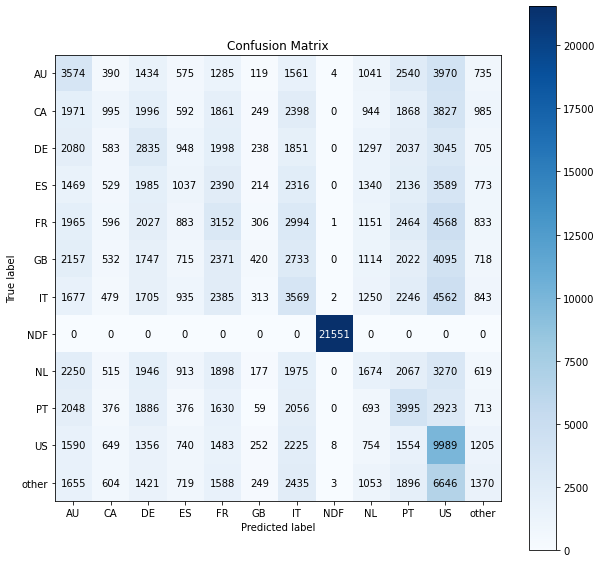

In [22]:
mt.plot_confusion_matrix(y_val, lr_val, figsize=(10,10))

In [29]:
accuracy = accuracy_score(y_val, lr_val)
print('O modelo Obteve {:.2f}% de acurácia'.format(accuracy))

O modelo Obteve 0.24 % de acurácia


In [30]:
print(classification_report(y_val, lr_val))

              precision    recall  f1-score   support

          AU       0.16      0.21      0.18     17228
          CA       0.16      0.06      0.08     17686
          DE       0.14      0.16      0.15     17617
          ES       0.12      0.06      0.08     17778
          FR       0.14      0.15      0.15     20940
          GB       0.16      0.02      0.04     18624
          IT       0.14      0.18      0.15     19966
         NDF       1.00      1.00      1.00     21551
          NL       0.14      0.10      0.11     17304
          PT       0.16      0.24      0.19     16755
          US       0.20      0.46      0.28     21805
       other       0.14      0.07      0.09     19639

    accuracy                           0.24    226893
   macro avg       0.22      0.22      0.21    226893
weighted avg       0.23      0.24      0.22    226893



## Random Forest

In [8]:
rf_model = RandomForestClassifier(n_estimators= 500,random_state= 32, n_jobs= -1)

rf_model.fit(x_train, y_train)

In [9]:
#Salvando o treinamento em um arquico compactado
pickle.dump(rf_model, open(path_model+'ciclo010_Random_Forest.pkl', 'wb'))

In [8]:
#Resultado do Treinamento
rf_train =round(rf_model.score(x_train, y_train) * 100, 2)
print(f'Logistic Regression Model Accuracy: {rf_train}%')

Logistic Regression Model Accuracy: 99.33%


In [9]:
#Validation Prediction
rf_val = rf_model.predict(x_val)
accuracy = accuracy_score(y_val, rf_val)
print('O modelo Obteve {:.2f}% de acurácia'.format(accuracy))

O modelo Obteve 0.96% de acurácia


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

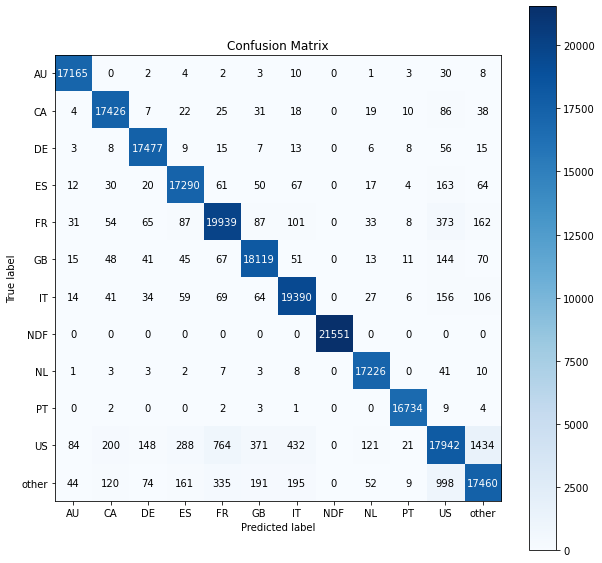

In [10]:
mt.plot_confusion_matrix(y_val, rf_val, figsize=(10,10))

In [11]:
print(classification_report(y_val, rf_val))

              precision    recall  f1-score   support

          AU       0.99      1.00      0.99     17228
          CA       0.97      0.99      0.98     17686
          DE       0.98      0.99      0.98     17617
          ES       0.96      0.97      0.97     17778
          FR       0.94      0.95      0.94     20940
          GB       0.96      0.97      0.96     18624
          IT       0.96      0.97      0.96     19966
         NDF       1.00      1.00      1.00     21551
          NL       0.98      1.00      0.99     17304
          PT       1.00      1.00      1.00     16755
          US       0.90      0.82      0.86     21805
       other       0.90      0.89      0.90     19639

    accuracy                           0.96    226893
   macro avg       0.96      0.96      0.96    226893
weighted avg       0.96      0.96      0.96    226893



## Decision Tree Model

In [101]:
dt_model = DecisionTreeClassifier(min_samples_leaf=4)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4)

In [102]:
#Salvando o treinamento em um arquico compactado
pickle.dump(dt_model, open(path_model+'ciclo010_Decision_Tree.pkl', 'wb'))

In [103]:
#Resultado do Treinamento
dt_train =round(dt_model.score(x_train, y_train) * 100, 2)
print(f'Logistic Regression Model Accuracy: {dt_train}%')

Logistic Regression Model Accuracy: 91.39%


In [106]:
#Validation Prediction
dt_val = dt_model.predict(x_val)
accuracy = accuracy_score(y_val, dt_val)
print('O modelo Obteve {:.2f}% de acurácia'.format(accuracy))

O modelo Obteve 0.84% de acurácia


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

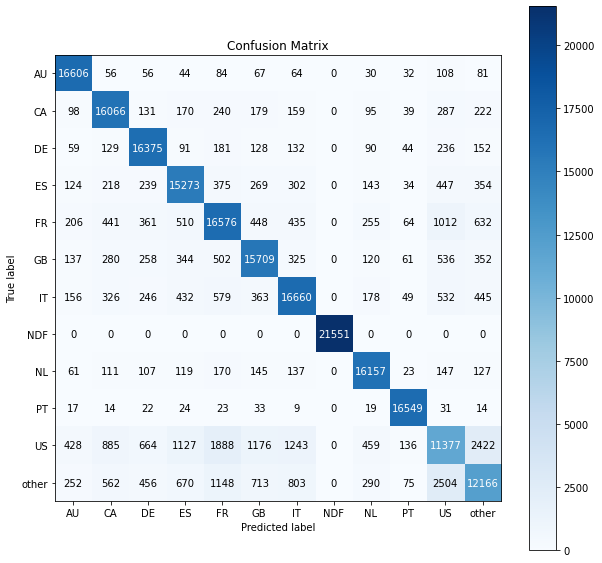

In [107]:
mt.plot_confusion_matrix(y_val, dt_val, figsize=(10,10))

In [108]:
print(classification_report(y_val, dt_val))

              precision    recall  f1-score   support

          AU       0.92      0.96      0.94     17228
          CA       0.84      0.91      0.87     17686
          DE       0.87      0.93      0.90     17617
          ES       0.81      0.86      0.84     17778
          FR       0.76      0.79      0.78     20940
          GB       0.82      0.84      0.83     18624
          IT       0.82      0.83      0.83     19966
         NDF       1.00      1.00      1.00     21551
          NL       0.91      0.93      0.92     17304
          PT       0.97      0.99      0.98     16755
          US       0.66      0.52      0.58     21805
       other       0.72      0.62      0.66     19639

    accuracy                           0.84    226893
   macro avg       0.84      0.85      0.84    226893
weighted avg       0.84      0.84      0.84    226893

